WORK FLOW

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Data Collection and Processing

In [12]:
#load the csv data and coverting it to a pandas df
gold_data=pd.read_csv('gld_price_data.csv')


In [13]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [14]:
gold_data.shape


(2290, 6)

In [18]:
gold_data.dtypes

Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object

In [19]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [20]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [21]:
#checking the no of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [22]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [27]:
# correlation=gold_data.corr()
# plt.figure(figsize=(8,8))
# sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

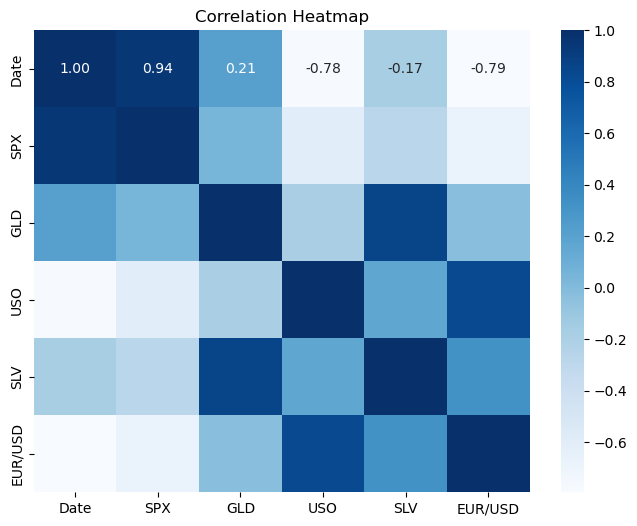

In [26]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

correlation = gold_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
#We can see that there is a good correlation bwteen the gold and slv 
correlation['GLD']

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

C:\Users\ArathiKizhakoodan\AppData\Local\Temp\ipykernel_20876\1384357783.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')
C:\Users\ArathiKizhakoodan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='GLD', ylabel='Density'>

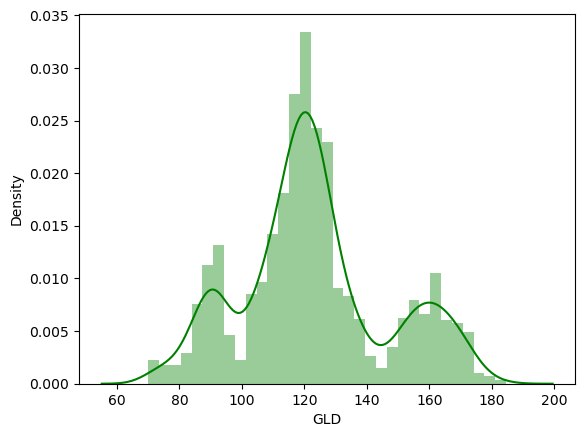

In [29]:
#checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

In [30]:
#Splitting the data to features and target (gold price)
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']


In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
# shuffling applied to the data before applying the split.

Model training
Random Forest Regressor


1.Load the model to the variable.
2.Train the model.

In [39]:
regressor=RandomForestRegressor(n_estimators=100)
#we load the model into the variable regressor with the given parameter


In [40]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [41]:
#Model Evaluation
#Prediction on test data

In [42]:
test_data_prediction=regressor.predict(X_test)

In [43]:
print(test_data_prediction)

[168.22979897  81.8518     116.07770014 127.66650091 120.49950136
 154.56499768 150.57349863 126.2422004  117.49939874 126.0718005
 116.70780088 172.13840117 141.64609822 167.48559842 115.03610039
 117.72610041 139.4775035  169.63860101 159.77900364 159.76849902
 155.1791999  125.3014001  176.36869973 157.32510408 125.15020032
  93.76479971  77.90140035 120.57049986 119.07629934 167.46569989
  88.14220071 125.09770018  91.10590086 117.56590018 121.16399936
 136.28620091 115.47120132 115.24070071 146.78670061 107.09020104
 104.22700244  87.2807979  126.4492007  118.05109976 152.82309973
 119.65559985 108.42799972 107.89169839  93.07250037 127.09689786
  74.42770056 113.5479988  121.11760032 111.1904994  118.78099884
 120.43729947 159.70250025 168.88290145 147.16899703  85.90769868
  94.37130051  87.0358985   90.62450003 118.8836008  126.46060066
 127.62500028 169.89900033 122.29729926 117.39099854  98.51270055
 168.00660097 143.05159858 132.25510278 121.20170269 121.11249947
 119.824500

In [44]:
#R squared error
error_score=metrics.r2_score(Y_test,test_data_prediction)

In [45]:
error_score

0.9897901271431575

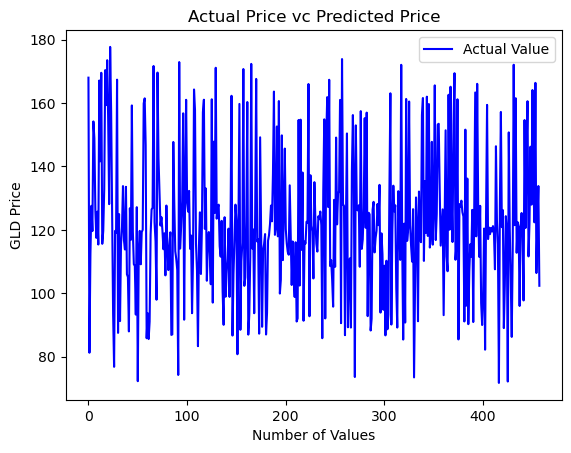

In [48]:
Y_test=list(Y_test)
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(Ytest_data_prediction='green',label='Predicted Value')
plt.title('Actual Price vc Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

